In [21]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
data=pd.read_excel('data.xls')
data=data.dropna(axis='columns')


In [23]:
data.head()

,Sürücü No,Ortalama Sürüş Hızı (km/s),Ortalama Takip Mesafesi (m)
0,1,79.0,54.0
1,2,83.1,66.0
2,3,43.4,33.0
3,4,44.2,89.0
4,5,56.2,59.8


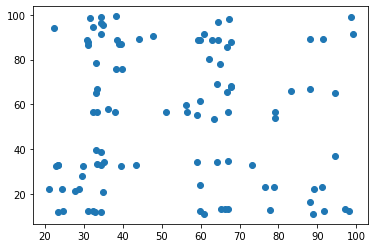

In [24]:
plt.plot(data['Ortalama Sürüş Hızı (km/s)'],data['Ortalama Takip Mesafesi (m)'],"o")

In [25]:
from sklearn.cluster import KMeans

In [32]:
dt=pd.DataFrame()
dt['a']=data['Ortalama Sürüş Hızı (km/s)']
dt['b']=data['Ortalama Takip Mesafesi (m)']

In [45]:
km = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(dt)

In [46]:
X=data['Ortalama Takip Mesafesi (m)']
Y=data['Ortalama Sürüş Hızı (km/s)']

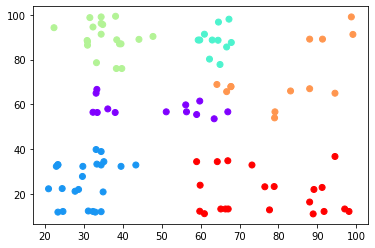

In [47]:
plt.scatter(Y,X, c=km.labels_, cmap='rainbow')

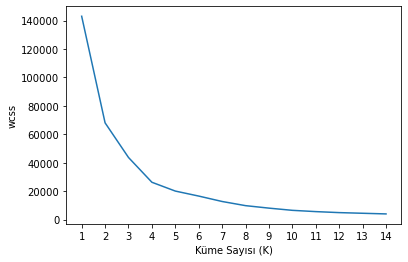

In [48]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(dt)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,15),wcss)
plt.xticks(range(1,15))
plt.xlabel("Küme Sayısı (K)")
plt.ylabel("wcss")
plt.show()

In [50]:
!pip install kneed

In [54]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 15), wcss, curve="convex", direction="decreasing")
kl.elbow

4